In [5]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
df=pd.read_csv("D:\DATA_SCIENCE\MACHINE LEARNING\DECISION TREE HANDSON\heart.csv")

In [8]:
df.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0


In [10]:
df.shape

(303, 14)

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df['target'].unique()

array([1, 0], dtype=int64)

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
df[df['chol']>300].shape

(43, 14)

In [22]:
df[df['chol']>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [24]:
f=df[df['thal']==2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [25]:
f[f['target']==1].shape

(130, 14)

In [26]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'Age distribution')

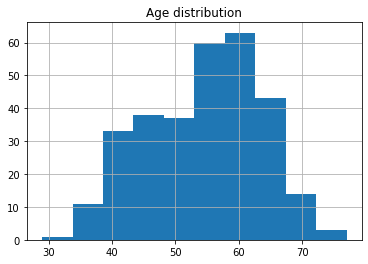

In [27]:
df['age'].hist(grid=True,bins=10)
plt.title("Age distribution")

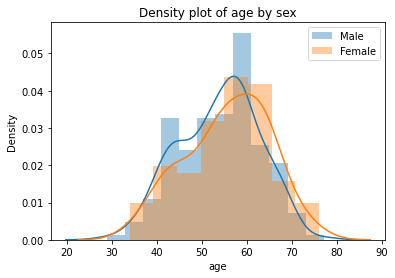

In [32]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df[df['sex']==1]['age'],label='Male')
sns.distplot(df[df['sex']==0]['age'],label='Female')
plt.legend()
plt.title("Density plot of age by sex")
plt.show()


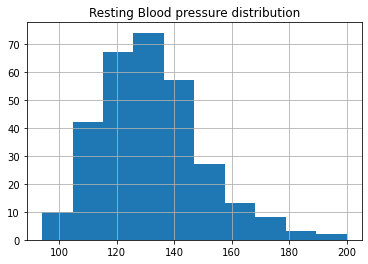

In [34]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribution')
plt.show()

Text(0.5, 1.0, 'Resting Blood pressure distribution')

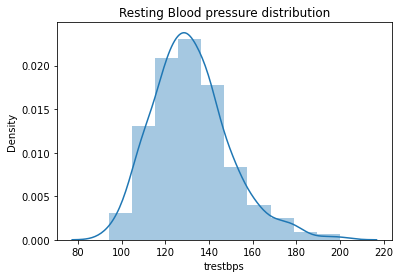

In [36]:
sns.distplot(df['trestbps'],bins=10)
plt.title('Resting Blood pressure distribution')

<AxesSubplot:xlabel='oldpeak'>

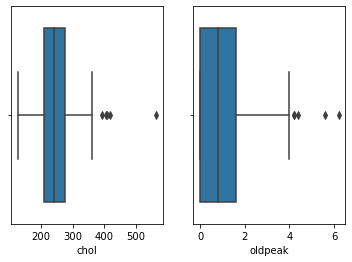

In [37]:
fig,axes =plt.subplots(nrows=1,ncols=2)
sns.boxplot(x='chol',data=df,ax=axes[0])
sns.boxplot(x='oldpeak',data=df,ax=axes[1])

Text(0.5, 1.0, 'count of target feature by sex')

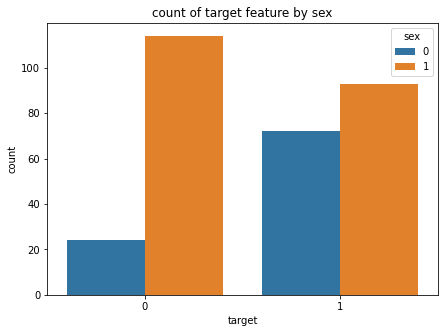

In [38]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(x='target',hue='sex',data=df);
plt.title('count of target feature by sex')

In [39]:
df.drop(columns=['target'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [40]:
x=df.drop(columns=['target'])
y=df['target']
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [54]:
dtcf=tree.DecisionTreeClassifier(max_depth=3)
dtcf.fit(x_train,y_train)
y_pred=dtcf.predict(x_train)
y_pred1=dtcf.predict(x_test)

In [57]:
print({accuracy_score(y_pred,y_train)})
print({accuracy_score(y_pred1,y_test)})

{0.8679245283018868}
{0.8131868131868132}


In [58]:
def plot_confusionmatrix(y_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf=confusion_matrix(y_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
    plt.show()

Train Confusion matrix


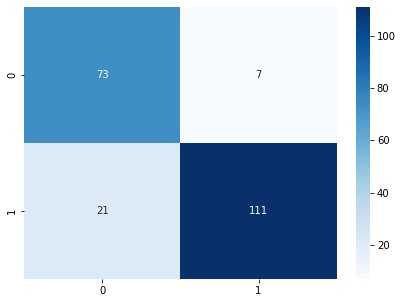

In [59]:
plot_confusionmatrix(y_pred,y_train,dom='Train')

Test Confusion matrix


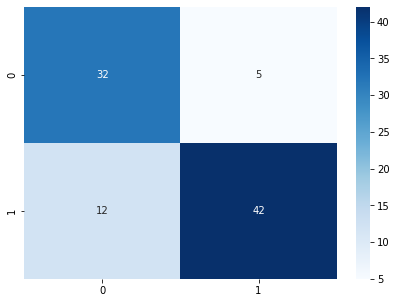

In [60]:
plot_confusionmatrix(y_pred1,y_test,dom='Test')

In [62]:
c_parameter_name='max_depth'
c_parameter_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1=pd.DataFrame(columns=['max_depth','accuracy'])

In [63]:
for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(x_train, y_train)
    y_pred2 = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred2)*100
    df1= df1.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
df1

,max_depth,accuracy
0,1.0,76.923077
1,2.0,73.626374
2,3.0,81.318681
3,4.0,76.923077
4,5.0,73.626374
5,6.0,74.725275
6,7.0,72.527473
7,8.0,71.428571
8,9.0,72.527473
9,10.0,75.824176


In [65]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred2)*100
acc_score

81.31868131868131

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.89      0.78      0.83        54

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91

